In [192]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scipy.stats as st
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [193]:
df=pd.read_csv("CensusData.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [194]:
df.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [195]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [196]:
df.shape

(32560, 15)

In [197]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Checking Datatypes

In [198]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Checking Null Values

In [199]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values,so we can proceed further.

# EDA PROCESS

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [201]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


To see value counts of columns as the dataset is big so check whether any unknown values present.

In [202]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [203]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [204]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [205]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [206]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [207]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [208]:
df['Occupation']=df['Occupation'].replace(['?'],'Prof-specialty')
df['Workclass']=df['Workclass'].replace(['?'],'Private')
df['Native_country']=df['Native_country'].replace(['?'],'United-States')

In [209]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [210]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [211]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

# Label Encoder

In [215]:
from sklearn.preprocessing import LabelEncoder
columns=['Education','Marital_status','Income','Occupation','Relationship','Race','Sex','Workclass','Native_country']
le=LabelEncoder()
for cols in columns:
    df[cols]=le.fit_transform(df[cols])

In [216]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Correlation Matrix

In [217]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

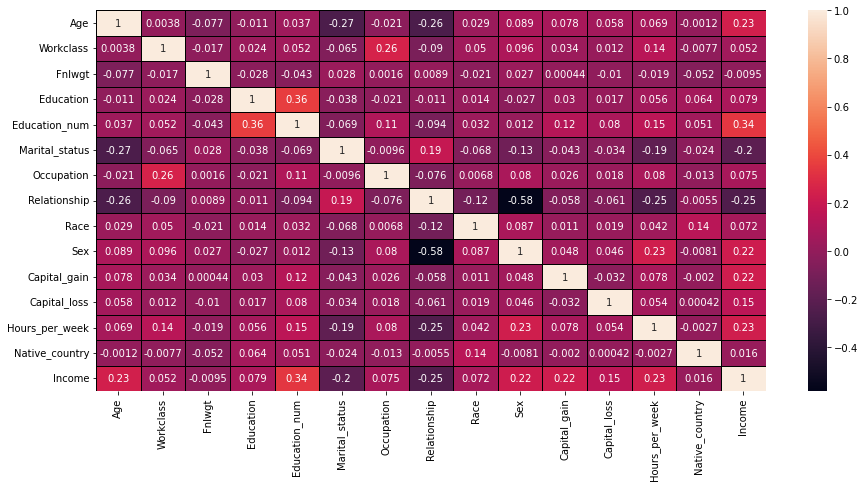

In [218]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

# CountPlot

<AxesSubplot:xlabel='Race', ylabel='count'>

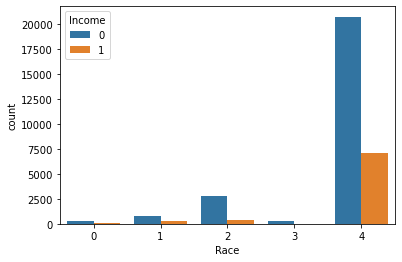

In [219]:
sns.countplot(df['Race'],hue='Income',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

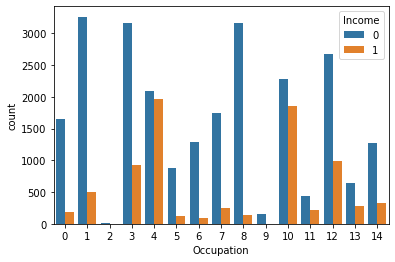

In [220]:
sns.countplot(df['Occupation'],hue='Income',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

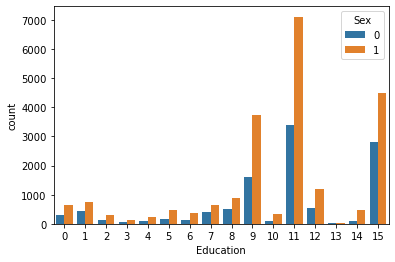

In [221]:
sns.countplot(df['Education'],hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

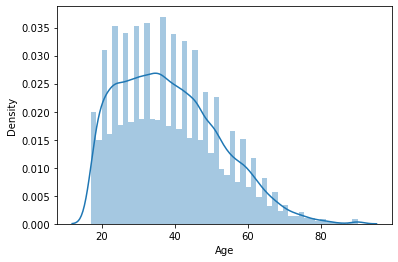

In [222]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

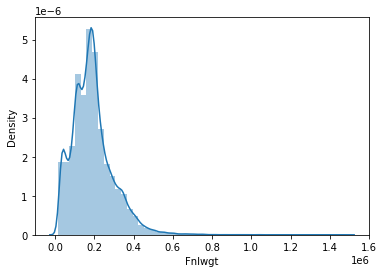

In [223]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

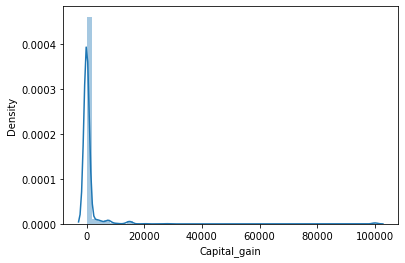

In [224]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

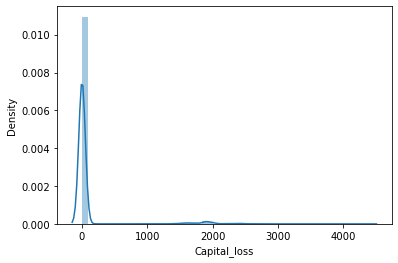

In [225]:
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

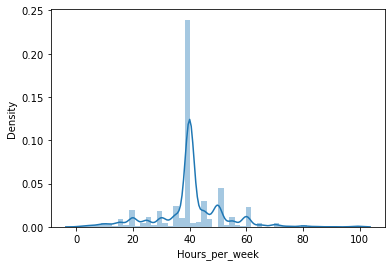

In [226]:
sns.distplot(df['Hours_per_week'])

In [227]:
df.skew().sort_values()

Native_country    -3.658235
Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Income             1.212383
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

# Log Transformation

<AxesSubplot:xlabel='Age', ylabel='Density'>

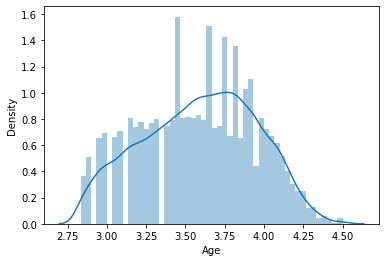

In [228]:
df['Age']=np.log(df['Age'])
sns.distplot(df['Age'])

# To check Outliers

<AxesSubplot:>

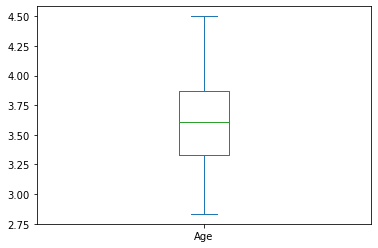

In [229]:
df['Age'].plot.box()

<AxesSubplot:>

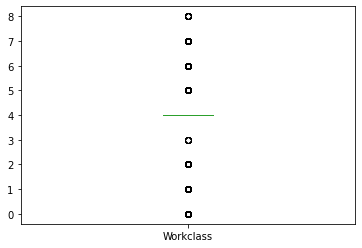

In [230]:
df['Workclass'].plot.box()

<AxesSubplot:>

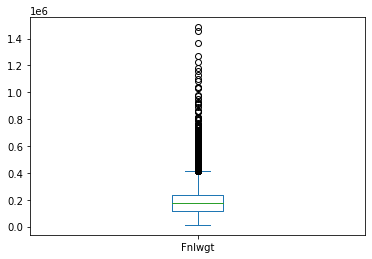

In [231]:
df['Fnlwgt'].plot.box()

<AxesSubplot:>

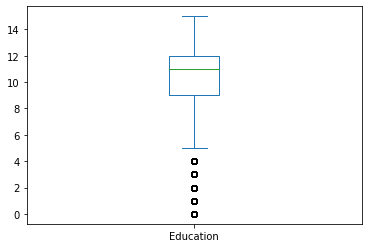

In [232]:
df['Education'].plot.box()

<AxesSubplot:>

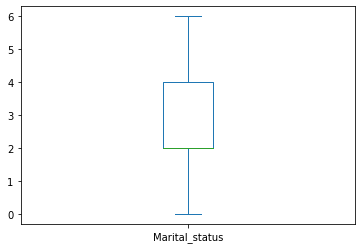

In [233]:
df['Marital_status'].plot.box()

<AxesSubplot:>

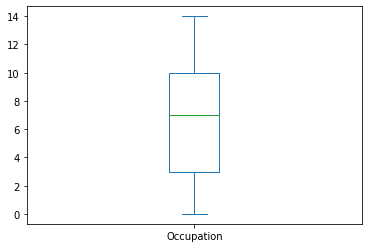

In [234]:
df['Occupation'].plot.box()

<AxesSubplot:>

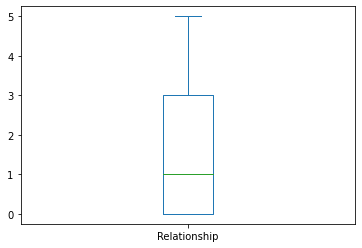

In [235]:
df['Relationship'].plot.box()

<AxesSubplot:>

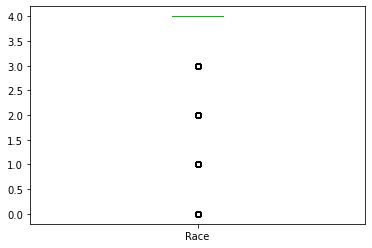

In [236]:
df['Race'].plot.box()

<AxesSubplot:>

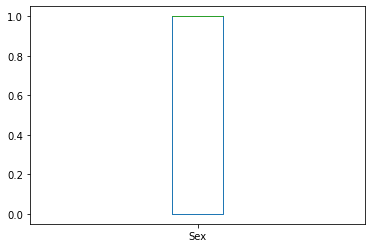

In [237]:
df['Sex'].plot.box()

<AxesSubplot:>

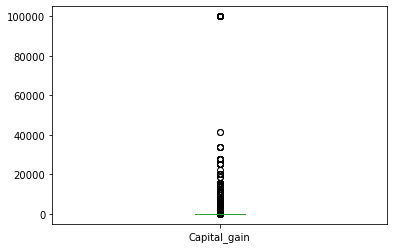

In [238]:
df['Capital_gain'].plot.box()

<AxesSubplot:>

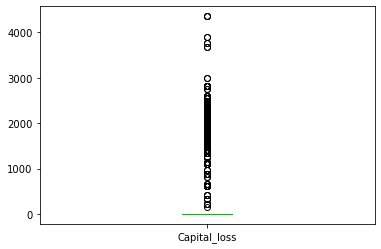

In [239]:
df['Capital_loss'].plot.box()

<AxesSubplot:>

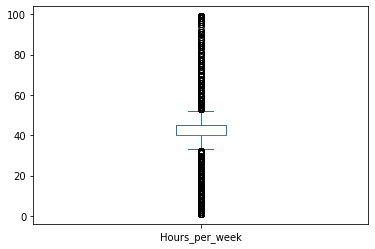

In [240]:
df['Hours_per_week'].plot.box()

<AxesSubplot:>

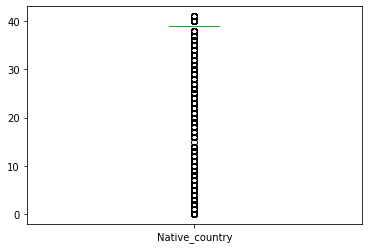

In [241]:
df['Native_country'].plot.box()

<AxesSubplot:>

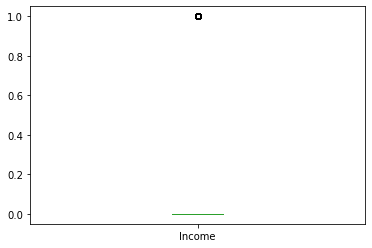

In [242]:
df['Income'].plot.box()

Few Outliers are present in the column we can eleminate that

In [243]:
#Dropping Unnecessary Columns
cols=['Capital_gain','Capital_loss']
df=df.drop(columns=cols,axis=1)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,3.912023,6,83311,9,13,2,4,0,4,1,13,39,0
1,3.637586,4,215646,11,9,0,6,1,4,1,40,39,0
2,3.970292,4,234721,1,7,2,6,0,2,1,40,39,0
3,3.332205,4,338409,9,13,2,10,5,2,0,40,5,0
4,3.610918,4,284582,12,14,2,4,5,4,0,40,39,0


# Removing Outliers

In [244]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,3.912023,6,83311,9,13,2,4,0,4,1,13,39,0
1,3.637586,4,215646,11,9,0,6,1,4,1,40,39,0
2,3.970292,4,234721,1,7,2,6,0,2,1,40,39,0
4,3.610918,4,284582,12,14,2,4,5,4,0,40,39,0
5,3.891820,4,160187,6,5,3,8,1,2,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,257302,7,12,2,13,5,4,0,38,39,0
32556,3.688879,4,154374,11,9,2,7,0,4,1,40,39,1
32557,4.060443,4,151910,11,9,6,1,4,4,0,40,39,0
32558,3.091042,4,201490,11,9,4,1,3,4,1,20,39,0


# Training and Testing Data

In [245]:
x=df_new.drop(['Income'],axis=1)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,3.912023,6,83311,9,13,2,4,0,4,1,13,39
1,3.637586,4,215646,11,9,0,6,1,4,1,40,39
2,3.970292,4,234721,1,7,2,6,0,2,1,40,39
4,3.610918,4,284582,12,14,2,4,5,4,0,40,39
5,3.891820,4,160187,6,5,3,8,1,2,0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,257302,7,12,2,13,5,4,0,38,39
32556,3.688879,4,154374,11,9,2,7,0,4,1,40,39
32557,4.060443,4,151910,11,9,6,1,4,4,0,40,39
32558,3.091042,4,201490,11,9,4,1,3,4,1,20,39


In [246]:
y=df_new['Income']
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29009, dtype: int32

In [247]:
df1=df_new.copy()

# Scaling the data using Min-Max Scaler

In [248]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [249]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [250]:
lr=LogisticRegression()

In [251]:
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(lr.score(x_train,y_train)))
print('Accuracy on testing data:',format(lr.score(x_test,y_test)))

Accuracy on training data: 0.7594691256948335
Accuracy on testing data: 0.7516373664253706


# Confusion Matrix and Classification Report

In [252]:
predlr=lr.predict(x_test)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

[[4361    0]
 [1441    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4361
           1       0.00      0.00      0.00      1441

    accuracy                           0.75      5802
   macro avg       0.38      0.50      0.43      5802
weighted avg       0.56      0.75      0.65      5802



In [253]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))

Accuracy on training data: 0.9998707286594563
Accuracy on testing data: 0.8217855911754567


In [254]:
predrfc=rfc.predict(x_test)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[3959  402]
 [ 632  809]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4361
           1       0.67      0.56      0.61      1441

    accuracy                           0.82      5802
   macro avg       0.77      0.73      0.75      5802
weighted avg       0.81      0.82      0.82      5802



In [255]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(dtc.score(x_train,y_train)))
print('Accuracy on testing data:',format(dtc.score(x_test,y_test)))

Accuracy on training data: 0.9999569095531521
Accuracy on testing data: 0.7718028266115132


In [256]:
preddtc=rfc.predict(x_test)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[3959  402]
 [ 632  809]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4361
           1       0.67      0.56      0.61      1441

    accuracy                           0.82      5802
   macro avg       0.77      0.73      0.75      5802
weighted avg       0.81      0.82      0.82      5802



In [257]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(svc.score(x_train,y_train)))
print('Accuracy on testing data:',format(svc.score(x_test,y_test)))

Accuracy on training data: 0.7594691256948335
Accuracy on testing data: 0.7516373664253706


In [258]:
predsvc=svc.predict(x_test)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[4361    0]
 [1441    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4361
           1       0.00      0.00      0.00      1441

    accuracy                           0.75      5802
   macro avg       0.38      0.50      0.43      5802
weighted avg       0.56      0.75      0.65      5802



# From the above 4 models we choose RandomForestClassifier as our model as we getting maximum accuracy from it.

# Hyperparameter Tuning

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

Accuracy on training data: 0.999954406601924
Accuracy on testing data: 0.8481035740335522


# AUC ROC Curve

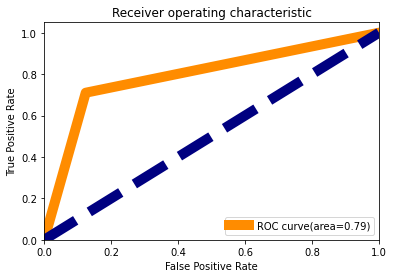

In [170]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predrfc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


# Model Saving

In [172]:
import pickle
filename="CensusPrediction.pkl"
pickle.dump(lr,open(filename,'wb'))

In [173]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
ds_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
ds_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5479,1,0
5480,0,0
5481,0,0
5482,1,0
